# Image Augmentation

In [6]:
# Imports
import numpy as np

import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torch import optim
from torch.optim import SGD, Adam

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt 
%matplotlib inline

from imgaug import augmenters as iaa 

In [2]:
# Load data
data_directory = 'D:/book-implementations/packt-modern-computer-vision-with-pytorch/03-building-deep-nn-with-pytorch/images/FMNIST'
fmnist = datasets.FashionMNIST(
    data_directory,
    download=False,
    train=True
    )

tr_images = fmnist.data
tr_targets = fmnist.targets 

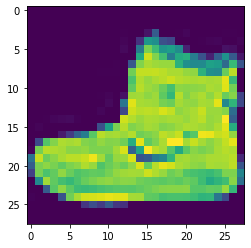

In [5]:
# Plot first image

plt.imshow(tr_images[0])

Text(0.5, 1.0, 'Scaled Image')

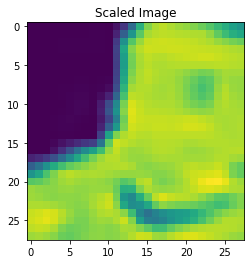

In [12]:
# Utility
def to_numpy(tensor):
    return tensor.cpu().detach().numpy()

# Define object for scaling
aug = iaa.Affine(scale=2)

plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Scaled Image')

Text(0.5, 1.0, 'Translated Image by 10 Pixels')

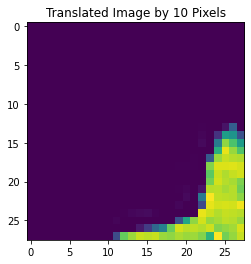

In [16]:
# Translate Pixels
aug = iaa.Affine(translate_px=10)

plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Translated Image by 10 Pixels')

Text(0.5, 1.0, 'Translated Image by 10 Pixels across columns and 2 pixels across rows')

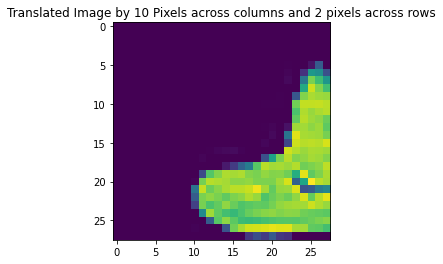

In [22]:
# Translate Pixels and specify per axis
aug = iaa.Affine(translate_px={'x':10, 'y':2})

plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Translated Image by 10 Pixels across columns and 2 pixels across rows')

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

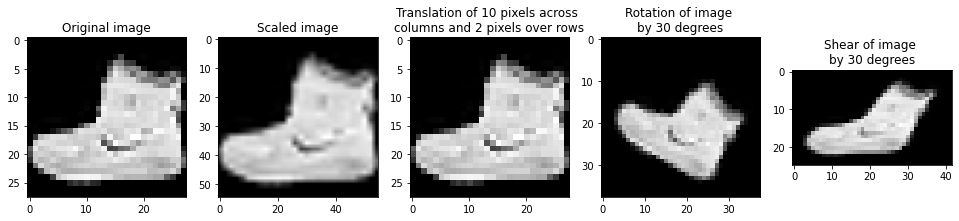

In [23]:
# fit_output

plt.figure(figsize=(20,20))

plt.subplot(161)
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')

plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Scaled image')

plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')

plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image \nby 30 degrees')

plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image \nby 30 degrees')